# Rigid-body transformations in three-dimensions

> Marcos Duarte, Renato Naville Watanabe  
> Laboratory of Biomechanics and Motor Control ([http://pesquisa.ufabc.edu.br/bmclab](http://pesquisa.ufabc.edu.br/bmclab))  
> Federal University of ABC, Brazil

The kinematics of a rigid body is completely described by its pose, i.e., its position and orientation in space (and the corresponding changes, translation and rotation). In a three-dimensional space, at least three coordinates and three angles are necessary to describe the pose of the rigid body, totalizing six degrees of freedom for a rigid body.

In motion analysis, to describe a translation and rotation of a rigid body with respect to a coordinate system, typically we attach another coordinate system to the rigid body and determine a transformation between these two coordinate systems.

A transformation is any function mapping a set to another set. For the description of the kinematics of rigid bodies, we are interested only in what is called rigid or Euclidean transformations (denoted as SE(3) for the three-dimensional space) because they preserve the distance between every pair of points of the body (which is considered rigid by definition). Translations and rotations are examples of rigid transformations (a reflection is also an example of rigid transformation but this changes the right-hand axis convention to a left hand, which usually is not of interest). In turn, rigid transformations are examples of [affine transformations](https://en.wikipedia.org/wiki/Affine_transformation). Examples of other affine transformations are shear and scaling transformations (which preserves angles but not lengths). 

We will follow the same rationale as in the notebook [Rigid-body transformations in a plane (2D)](http://nbviewer.ipython.org/github/BMClab/bmc/blob/master/notebooks/Transformation2D.ipynb) and we will skip the fundamental concepts already covered there. So, you if haven't done yet, you should read that notebook before continuing here.

## Translation

A pure three-dimensional translation of a rigid body (or a coordinate system attached to it) in relation to other rigid body (with other coordinate system) is illustrated in the figure below.  
<br>
<figure><img src='./../images/translation3D.png' alt='translation 3D'/> <figcaption><center><i>Figure. A point in three-dimensional space represented in two coordinate systems, with one coordinate system translated.</i></center></figcaption> </figure>

The position of point $\mathbf{P}$ originally described in the $xyz$ (local) coordinate system but now described in the $\mathbf{XYZ}$ (Global) coordinate system in vector form is:

$$ \mathbf{P_G} = \mathbf{L_G} + \mathbf{P_l} $$

Or in terms of its components:

<span class="notranslate">
\begin{equation}
\begin{array}{}
\mathbf{P_X} =& \mathbf{L_X} + \mathbf{P}_x \\
\mathbf{P_Y} =& \mathbf{L_Y} + \mathbf{P}_y \\
\mathbf{P_Z} =& \mathbf{L_Z} + \mathbf{P}_z 
\end{array}
\end{equation}
</span>

And in matrix form:

<span class="notranslate">
\begin{equation}
\begin{bmatrix}
\mathbf{P_X} \\
\mathbf{P_Y} \\
\mathbf{P_Z} 
\end{bmatrix} =
\begin{bmatrix}
\mathbf{L_X} \\
\mathbf{L_Y} \\
\mathbf{L_Z} 
\end{bmatrix} +
\begin{bmatrix}
\mathbf{P}_x \\
\mathbf{P}_y \\
\mathbf{P}_z 
\end{bmatrix}
\end{equation}
</span>

From classical mechanics, this is an example of [Galilean transformation](http://en.wikipedia.org/wiki/Galilean_transformation).   

Let's use Python to compute some numeric examples:

In [3]:
# Import the necessary libraries
import numpy as np
# suppress scientific notation for small numbers:
np.set_printoptions(precision=4, suppress=True)

For example, if the local coordinate system is translated by $\mathbf{L_G}=[1, 2, 3]$ in relation to the Global coordinate system, a point with coordinates $\mathbf{P_l}=[4, 5, 6]$ at the local coordinate system will have the position $\mathbf{P_G}=[5, 7, 9]$ at the Global coordinate system:

In [4]:
LG = np.array([1, 2, 3])  # Numpy array
Pl = np.array([4, 5, 6])
PG = LG + Pl
PG

array([5, 7, 9])

This operation also works if we have more than one point (NumPy try to guess how to handle vectors with different dimensions):

In [5]:
Pl = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # 2D array with 3 rows and 2 columns
PG = LG + Pl
PG

array([[ 2,  4,  6],
       [ 5,  7,  9],
       [ 8, 10, 12]])

## Rotation

A pure three-dimensional rotation of a $xyz$ (local) coordinate system in relation to other $\mathbf{XYZ}$ (Global) coordinate system and the position of a point in these two coordinate systems are illustrated in the next figure (remember that this is equivalent to describing a rotation between two rigid bodies).  
<br>
<figure><img src='./../images/rotation3D.png' alt='rotation 3D'/> <figcaption><center><i>A point in three-dimensional space represented in two coordinate systems, with one system rotated.</i></center></figcaption> </figure>

In analogy to the rotation in two dimensions, we can calculate the rotation matrix that describes the rotation of the $xyz$ (local) coordinate system in relation to the $\mathbf{XYZ}$ (Global) coordinate system using the direction cosines between the axes of the two coordinate systems:

<span class="notranslate">
\begin{equation}
\mathbf{R_{Gl}} = \begin{bmatrix}
\cos\mathbf{X}x & \cos\mathbf{X}y & \cos\mathbf{X}z \\
\cos\mathbf{Y}x & \cos\mathbf{Y}y & \cos\mathbf{Y}z \\
\cos\mathbf{Z}x & \cos\mathbf{Z}y & \cos\mathbf{Z}z
\end{bmatrix}
\end{equation}
</span>

Note however that for rotations around more than one axis, these angles will not lie in the main planes ($\mathbf{XY, YZ, ZX}$) of the $\mathbf{XYZ}$ coordinate system, as illustrated in the figure below for the direction angles of the $y$ axis only. Thus, the determination of these angles by simple inspection, as we have done for the two-dimensional case, would not be simple.  
<br>
<figure>
<img src='./../images/directioncosine3D.png' width=260 alt='direction angles 3D'/> <figcaption><center><i>Figure. Definition of direction angles for the $y$ axis of the local coordinate system in relation to the $\mathbf{XYZ}$ Global coordinate system.</i></center></figcaption>
</figure>

Note that the nine angles shown in the matrix above for the direction cosines are obviously redundant since only three angles are necessary to describe the orientation of a rigid body in the three-dimensional space. 

An important characteristic of angles in the three-dimensional space is that angles cannot be treated as vectors: the result of a sequence of rotations of a rigid body around different axes depends on the order of the rotations, as illustrated in the next figure.  
<br>
<figure>
<img src='./../images/rotationsseqs2.png' alt='rotations'/><figcaption><i>Figure. The result of a sequence of rotations around different axes of a coordinate system depends on the order of the rotations. In the first example (first row), the rotations are around a Global (fixed) coordinate system. In the second example (second row), the rotations are around a local (rotating) coordinate system.</i></figcaption>
</figure>

Let's focus now on how to understand rotations in the three-dimensional space, looking at the rotations between coordinate systems (or between rigid bodies). Later we will apply what we have learned to describe the position of a point in these different coordinate systems.

### Euler angles

There are different ways to describe a three-dimensional rotation of a rigid body (or of a coordinate system). The most straightforward solution would probably be to use a [spherical coordinate system](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/ReferenceFrame.ipynb#Spherical-coordinate-system), but spherical coordinates would be difficult to give an anatomical or clinical interpretation. A solution that has been often employed in biomechanics to handle rotations in the three-dimensional space is to use Euler angles. Under certain conditions, Euler angles can have an anatomical interpretation, but this representation also has some caveats. Let's see the Euler angles now.

[Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler) in the XVIII century showed that two three-dimensional coordinate systems with a common origin can be related by a sequence of up to three elemental rotations about the axes of the local coordinate system, where no two successive rotations may be about the same axis, which now are known as [Euler (or Eulerian) angles](http://en.wikipedia.org/wiki/Euler_angles).   

#### Elemental rotations

First, let's see rotations around a fixed Global coordinate system as we did for the two-dimensional case. The next figure illustrates elemental rotations of the local coordinate system around each axis of the fixed Global coordinate system.  
<br>
<figure>
<img src='./../images/rotations.png' alt='rotations'/> <figcaption><center><i>Figure. Elemental rotations of the $xyz$ coordinate system around each axis, $\mathbf{X}$, $\mathbf{Y}$, and $\mathbf{Z}$, of the fixed $\mathbf{XYZ}$ coordinate system. Note that for better clarity, the axis around where the rotation occurs is shown perpendicular to this page for each elemental rotation.</i></center></figcaption>
</figure>

#### Rotations around the fixed coordinate system

The rotation matrices for the elemental rotations around each axis of the fixed $\mathbf{XYZ}$ coordinate system (rotations of the local coordinate system in relation to the Global coordinate system) are shown next.

Around $\mathbf{X}$ axis: 

<span class="notranslate">
\begin{equation}
\mathbf{R_{Gl,\,X}} = 
\begin{bmatrix}
1 & 0 & 0 \\
0 & \cos\alpha & -\sin\alpha \\
0 & \sin\alpha & \cos\alpha
\end{bmatrix}
\end{equation}
</span>

Around $\mathbf{Y}$ axis: 

<span class="notranslate">
\begin{equation}
\mathbf{R_{Gl,\,Y}} = 
\begin{bmatrix}
\cos\beta & 0 & \sin\beta \\
0 & 1 & 0 \\
-\sin\beta & 0 & \cos\beta
\end{bmatrix}
\end{equation}
</span>

Around $\mathbf{Z}$ axis: 

<span class="notranslate">
\begin{equation}
\mathbf{R_{Gl,\,Z}} = 
\begin{bmatrix}
\cos\gamma & -\sin\gamma & 0\\
\sin\gamma & \cos\gamma & 0 \\
0 & 0 & 1
\end{bmatrix}
\end{equation}
</span>

These matrices are the rotation matrices for the case of two-dimensional coordinate systems plus the corresponding terms for the third axes of the local and Global coordinate systems, which are parallel.   
To understand why the terms for the third axes are 1's or 0's, for instance, remember they represent the cosine directors. The cosines between $\mathbf{X}x$, $\mathbf{Y}y$, and $\mathbf{Z}z$ for the elemental rotations around respectively the $\mathbf{X}$, $\mathbf{Y}$, and $\mathbf{Z}$ axes are all 1 because $\mathbf{X}x$, $\mathbf{Y}y$, and $\mathbf{Z}z$ are parallel <span class="notranslate">($\cos 0^o$)</span>. The cosines of the other elements are zero because the axis around where each rotation occurs is perpendicular to the other axes of the coordinate systems <span class="notranslate">($\cos 90^o$)</span>.

#### Rotations around the local coordinate system

The rotation matrices for the elemental rotations this time around each axis of the $xyz$ coordinate system (rotations of the Global coordinate system in relation to the local coordinate system), similarly to the two-dimensional case, are simply the transpose of the above matrices as shown next.

Around $x$ axis: 

<span class="notranslate">
\begin{equation}
\mathbf{R}_{\mathbf{lG},\,x} = 
\begin{bmatrix}
1 & 0 & 0 \\
0 & \cos\alpha & \sin\alpha \\
0 & -\sin\alpha & \cos\alpha
\end{bmatrix}
\end{equation}
</span>

Around $y$ axis: 

<span class="notranslate">
\begin{equation}
\mathbf{R}_{\mathbf{lG},\,y} = 
\begin{bmatrix}
\cos\beta & 0 & -\sin\beta \\
0 & 1 & 0 \\
\sin\beta & 0 & \cos\beta
\end{bmatrix}
\end{equation}
</span>

Around $z$ axis: 

<span class="notranslate">
\begin{equation}
\mathbf{R}_{\mathbf{lG},\,z} = 
\begin{bmatrix}
\cos\gamma & \sin\gamma & 0\\
-\sin\gamma & \cos\gamma & 0 \\
0 & 0 & 1
\end{bmatrix}
\end{equation}
</span>

Notice this is equivalent to instead of rotating the local coordinate system by $\alpha, \beta, \gamma$ in relation to axes of the Global coordinate system, to rotate the Global coordinate system by $-\alpha, -\beta, -\gamma$ in relation to the axes of the local coordinate system; remember that <span class="notranslate">
$\cos(-\:\cdot)=\cos(\cdot)$</span> and <span class="notranslate">$\sin(-\:\cdot)=-\sin(\cdot)$</span>.



#### Sequence of elemental rotations

Consider now a sequence of elemental rotations around the $\mathbf{X}$, $\mathbf{Y}$, and $\mathbf{Z}$ axes of the fixed $\mathbf{XYZ}$ coordinate system illustrated in the next figure.  
<br>
<figure><img src='./../images/rotations_XYZ.png' alt='rotations'/> <figcaption><center><i>Figure. Sequence of elemental rotations of the $xyz$ coordinate system around each axis, $\mathbf{X}$, $\mathbf{Y}$, $\mathbf{Z}$, of the fixed $\mathbf{XYZ}$ coordinate system.</i></center></figcaption> </figure>

This sequence of elemental rotations (each one of the local coordinate system with respect to the fixed Global coordinate system) is mathematically represented by a multiplication between the rotation matrices:

<span class="notranslate">
\begin{equation}
\begin{array}{l l}
\mathbf{R_{Gl,\;XYZ}} & = \mathbf{R_{Z}} \mathbf{R_{Y}} \mathbf{R_{X}} \\
\\ 
& = \begin{bmatrix}
\cos\gamma & -\sin\gamma & 0\\
\sin\gamma & \cos\gamma & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
\cos\beta & 0 & \sin\beta \\
0 & 1 & 0 \\
-\sin\beta & 0 & \cos\beta
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 \\
0 & \cos\alpha & -\sin\alpha \\
0 & \sin\alpha & \cos\alpha
\end{bmatrix} \\
\\ 
& =
\begin{bmatrix}
\cos\beta\:\cos\gamma \;&\;
\sin\alpha\:\sin\beta\:\cos\gamma-\cos\alpha\:\sin\gamma \;&\;
\cos\alpha\:\sin\beta\:cos\gamma+\sin\alpha\:\sin\gamma \;\;\; \\
\cos\beta\:\sin\gamma \;&\;
\sin\alpha\:\sin\beta\:\sin\gamma+\cos\alpha\:\cos\gamma \;&\;
\cos\alpha\:\sin\beta\:\sin\gamma-\sin\alpha\:\cos\gamma \;\;\;  \\
-\sin\beta \;&\; \sin\alpha\:\cos\beta \;&\; \cos\alpha\:\cos\beta \;\;\;
\end{bmatrix} 
\end{array}
\end{equation}
</span>

Note the order of the matrices.   

We can check this matrix multiplication using [Sympy](http://sympy.org/en/index.html):

In [6]:
#import the necessary libraries
from IPython.core.display import Math, display
import sympy as sym
cos, sin = sym.cos, sym.sin

a, b, g = sym.symbols('alpha, beta, gamma')

# Elemental rotation matrices of xyz in relation to XYZ:
RX = sym.Matrix([[1, 0, 0], [0, cos(a), -sin(a)], [0, sin(a), cos(a)]])
RY = sym.Matrix([[cos(b), 0, sin(b)], [0, 1, 0], [-sin(b), 0, cos(b)]])
RZ = sym.Matrix([[cos(g), -sin(g), 0], [sin(g), cos(g), 0], [0, 0, 1]])

# Rotation matrix of xyz in relation to XYZ:
RXYZ = RZ*RY*RX

display(Math(sym.latex(r'\mathbf{R_{Gl,\,XYZ}}=') + sym.latex(RXYZ, mat_str='matrix')))

<IPython.core.display.Math object>

For instance, we can calculate the numerical rotation matrix for these sequential elemental rotations by $90^o$ around $\mathbf{X,Y,Z}$:

In [7]:
R = sym.lambdify((a, b, g), RXYZ, 'numpy')
R = R(np.pi/2, np.pi/2, np.pi/2)
display(Math(r'\mathbf{R_{Gl,\,XYZ\,}}(90^o, 90^o, 90^o) =' + \
             sym.latex(sym.Matrix(R).n(chop=True, prec=3))))

<IPython.core.display.Math object>

Below you can test any sequence of rotation around the global coordinates. Just change the matrix R, and the angles of the variables $\alpha$, $\beta$ and $\gamma$. In the example below is the rotation around the global basis, in the sequence x,y,z, with the angles $\alpha=\pi/3$ rad, $\beta=\pi/4$ rad and $\gamma=\pi/6$ rad.

<IPython.core.display.Javascript object>


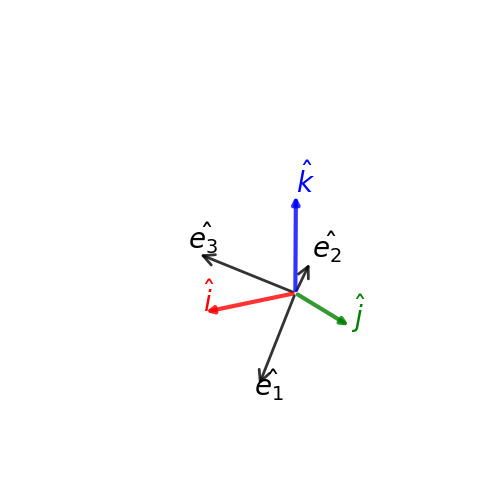

In [8]:
import sys
sys.path.insert(1, r'./../functions')  # add to pythonpath
%matplotlib notebook
from CCSbasis import CCSbasis

R = RZ*RY*RX
R = sym.lambdify((a, b, g), R, 'numpy')

alpha = np.pi/3
beta = np.pi/4
gamma = np.pi/6

R = R(alpha, beta, gamma)

e1 = np.array([[1,0,0]])
e2 = np.array([[0,1,0]])
e3 = np.array([[0,0,1]])

basis = np.vstack((e1,e2,e3))
basisRot = R@basis
CCSbasis(Oijk=np.array([0,0,0]), Oxyz=np.array([0,0,0]), ijk=basis.T, xyz=basisRot.T, vector=False)

Examining the matrix above and the correspondent previous figure, one can see they agree: the rotated $x$ axis (first column of the above matrix) has value -1 in the $\mathbf{Z}$ direction $[0,0,-1]$, the rotated $y$ axis (second column) is at the $\mathbf{Y}$ direction $[0,1,0]$, and the rotated $z$ axis (third column) is at the $\mathbf{X}$ direction $[1,0,0]$.

We also can calculate the sequence of elemental rotations around the $x$, $y$, $z$ axes of the rotating $xyz$ coordinate system illustrated in the next figure.  
<br>
<figure>
<img src='./../images/rotations_xyz2.png' alt='rotations'/> <figcaption><center><i>Figure. Sequence of elemental rotations of a second $xyz$ local coordinate system around each axis, $x$, $y$, $z$, of the rotating $xyz$ coordinate system.</i></center></figcaption>
</figure>

Likewise, this sequence of elemental rotations (each one of the local coordinate system with respect to the rotating local coordinate system) is mathematically represented by a multiplication between the rotation matrices (which are the inverse of the matrices for the rotations around $\mathbf{X,Y,Z}$ as we saw earlier):

<span class="notranslate">
\begin{equation}
\begin{array}{l l}
\mathbf{R}_{\mathbf{lG},\,xyz} & = \mathbf{R_{z}} \mathbf{R_{y}} \mathbf{R_{x}} \\
\\
& = \begin{bmatrix}
\cos\gamma & \sin\gamma & 0\\
-\sin\gamma & \cos\gamma & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
\cos\beta & 0 & -\sin\beta \\
0 & 1 & 0 \\
\sin\beta & 0 & \cos\beta
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 \\
0 & \cos\alpha & \sin\alpha \\
0 & -\sin\alpha & \cos\alpha
\end{bmatrix} \\
\\
& =
\begin{bmatrix}
\cos\beta\:\cos\gamma \;&\;
\sin\alpha\:\sin\beta\:\cos\gamma+\cos\alpha\:\sin\gamma \;&\;
\cos\alpha\:\sin\beta\:\cos\gamma-\sin\alpha\:\sin\gamma \;\;\; \\
-\cos\beta\:\sin\gamma \;&\;
-\sin\alpha\:\sin\beta\:\sin\gamma+\cos\alpha\:\cos\gamma \;&\;
\cos\alpha\:\sin\beta\:\sin\gamma+\sin\alpha\:\cos\gamma \;\;\;  \\
\sin\beta \;&\; -\sin\alpha\:\cos\beta \;&\; \cos\alpha\:\cos\beta \;\;\;
\end{bmatrix} 
\end{array}
\end{equation}
</span>

As before, the order of the matrices is from right to left.   

Once again, we can check this matrix multiplication using [Sympy](http://sympy.org/en/index.html):

In [10]:
a, b, g = sym.symbols('alpha, beta, gamma')
# Elemental rotation matrices of xyz (local):
Rx = sym.Matrix([[1, 0, 0], [0, cos(a), sin(a)], [0, -sin(a), cos(a)]])
Ry = sym.Matrix([[cos(b), 0, -sin(b)], [0, 1, 0], [sin(b), 0, cos(b)]])
Rz = sym.Matrix([[cos(g), sin(g), 0], [-sin(g), cos(g), 0], [0, 0, 1]])
# Rotation matrix of xyz' in relation to xyz:
Rxyz = Rz*Ry*Rx
Math(sym.latex(r'\mathbf{R}_{\mathbf{lG},\,xyz}=') + sym.latex(Rxyz, mat_str='matrix'))

<IPython.core.display.Math object>

For instance, let's calculate the numerical rotation matrix for these sequential elemental rotations by $90^o$ around $x,y,z$:

In [49]:
R = sym.lambdify((a, b, g), Rxyz, 'numpy')
R = R(np.pi/2, np.pi/2, np.pi/2)
display(Math(r'\mathbf{R}_{\mathbf{lG},\,xyz\,}(90^o, 90^o, 90^o) =' + \
             sym.latex(sym.Matrix(R).n(chop=True, prec=3))))

<IPython.core.display.Math object>

Once again, let's compare the above matrix and the correspondent previous figure to see if it makes sense. But remember that this matrix is the Global-to-local rotation matrix, $\mathbf{R}_{\mathbf{lG},\,xyz}$, where the coordinates of the local basis' versors are rows, not columns, in this matrix. With this detail in mind, one can see that the previous figure and matrix also agree: the rotated $x$ axis (first row of the above matrix) is at the $\mathbf{Z}$ direction $[0,0,1]$, the rotated $y$ axis (second row) is at the $\mathbf{-Y}$ direction $[0,-1,0]$, and the rotated $z$ axis (third row) is at the $\mathbf{X}$ direction $[1,0,0]$.

In fact, this example didn't serve to distinguish versors as rows or columns because the $\mathbf{R}_{\mathbf{lG},\,xyz}$ matrix above is symmetric!  
Let's look on the resultant matrix for the example above after only the first two rotations, $\mathbf{R}_{\mathbf{lG},\,xy}$ to understand this difference: 

In [50]:
Rxy = Ry*Rx
R = sym.lambdify((a, b), Rxy, 'numpy')
R = R(np.pi/2, np.pi/2)
display(Math(r'\mathbf{R}_{\mathbf{lG},\,xy\,}(90^o, 90^o) =' + \
             sym.latex(sym.Matrix(R).n(chop=True, prec=3))))

<IPython.core.display.Math object>

Comparing this matrix with the third plot in the figure, we see that the coordinates of versor $x$ in the Global coordinate system are $[0,1,0]$, i.e., local axis $x$ is aligned with Global axis $Y$, and this versor is indeed the first row, not first column, of the matrix above. Confer the other two rows.  

What are then in the columns of the local-to-Global rotation matrix?  
The columns are the coordinates of Global basis' versors in the local coordinate system! For example, the first column of the matrix above is the coordinates of $X$, which is aligned with $z$: $[0,0,1]$.

Below you can test any sequence of rotation, around the local coordinates. Just change the matrix R, and the angles of the variables $\alpha$, $\beta$ and $\gamma$. In the example below is the rotation around the local basis, in the sequence x,y,z, with the angles $\alpha=\pi/3$ rad, $\beta=\pi/4$ rad and $\gamma=\pi/2$ rad.

In [1]:
sys.path.insert(1, r'./../functions')  # add to pythonpath
%matplotlib notebook
from CCSbasis import CCSbasis

R = Rz*Ry*Rx
R = sym.lambdify((a, b, g), R, 'numpy')

alpha = np.pi/3
beta = np.pi/4
gamma = np.pi/6

R = R(alpha, beta, gamma)

e1 = np.array([[1,0,0]])
e2 = np.array([[0,1,0]])
e3 = np.array([[0,0,1]])

basis = np.vstack((e1,e2,e3))
basisRot = R@basis
CCSbasis(Oijk=np.array([0,0,0]), Oxyz=np.array([0,0,0]), ijk=basisRot.T, xyz=basis.T, vector=False)

NameError: name 'sys' is not defined

#### Rotations in a coordinate system is equivalent to minus rotations in the other coordinate system

Remember that we saw for the elemental rotations that it's equivalent to instead of rotating the local coordinate system, $xyz$, by $\alpha, \beta, \gamma$ in relation to axes of the Global coordinate system, to rotate the Global coordinate system, $\mathbf{XYZ}$, by $-\alpha, -\beta, -\gamma$ in relation to the axes of the local coordinate system. The same property applies to a sequence of rotations: rotations of $xyz$ in relation to $\mathbf{XYZ}$ by $\alpha, \beta, \gamma$ result in the same matrix as rotations of $\mathbf{XYZ}$ in relation to $xyz$ by $-\alpha, -\beta, -\gamma$:   

$$ \begin{array}{l l}
\mathbf{R_{Gl,\,XYZ\,}}(\alpha,\beta,\gamma) & = \mathbf{R_{Gl,\,Z}}(\gamma)\, \mathbf{R_{Gl,\,Y}}(\beta)\, \mathbf{R_{Gl,\,X}}(\alpha) \\
& = \mathbf{R}_{\mathbf{lG},\,z\,}(-\gamma)\, \mathbf{R}_{\mathbf{lG},\,y\,}(-\beta)\, \mathbf{R}_{\mathbf{lG},\,x\,}(-\alpha) \\
& = \mathbf{R}_{\mathbf{lG},\,xyz\,}(-\alpha,-\beta,-\gamma)
\end{array}
$$

Confer that by examining the $\mathbf{R_{Gl,\,XYZ}}$ and $\mathbf{R}_{\mathbf{lG},\,xyz}$ matrices above.

Let's verify this property with Sympy:

In [10]:
RXYZ = RZ*RY*RX
# Rotation matrix of xyz in relation to XYZ:
display(Math(sym.latex(r'\mathbf{R_{Gl,\,XYZ\,}}(\alpha,\beta,\gamma) =')))
display(Math(sym.latex(RXYZ, mat_str='matrix')))

# Elemental rotation matrices of XYZ in relation to xyz and negate all angles:
Rx_neg = sym.Matrix([[1, 0, 0], [0, cos(-a), -sin(-a)], [0, sin(-a), cos(-a)]]).T
Ry_neg = sym.Matrix([[cos(-b), 0, sin(-b)], [0, 1, 0], [-sin(-b), 0, cos(-b)]]).T
Rz_neg = sym.Matrix([[cos(-g), -sin(-g), 0], [sin(-g), cos(-g), 0], [0, 0, 1]]).T

# Rotation matrix of XYZ in relation to xyz:
Rxyz_neg = Rz_neg*Ry_neg*Rx_neg
display(Math(sym.latex(r'\mathbf{R}_{\mathbf{lG},\,xyz\,}(-\alpha,-\beta,-\gamma) =')))
display(Math(sym.latex(Rxyz_neg, mat_str='matrix')))

# Check that the two matrices are equal:
display(Math(sym.latex(r'\mathbf{R_{Gl,\,XYZ\,}}(\alpha,\beta,\gamma) \;==\;' + \
                       r'\mathbf{R}_{\mathbf{lG},\,xyz\,}(-\alpha,-\beta,-\gamma)')))
RXYZ == Rxyz_neg

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

True

#### Rotations in a coordinate system is the transpose of inverse order of rotations in the other coordinate system

There is another property of the rotation matrices for the different coordinate systems: the rotation matrix, for example from the Global to the local coordinate system for the $xyz$ sequence, is just the transpose of the rotation matrix for the inverse operation (from the local to the Global coordinate system) of the inverse sequence ($\mathbf{ZYX}$) and vice-versa:

$$ \begin{array}{l l}
\mathbf{R}_{\mathbf{lG},\,xyz}(\alpha,\beta,\gamma) & = \mathbf{R}_{\mathbf{lG},\,z\,} \mathbf{R}_{\mathbf{lG},\,y\,} \mathbf{R}_{\mathbf{lG},\,x} \\
& = \mathbf{R_{Gl,\,Z\,}^{-1}} \mathbf{R_{Gl,\,Y\,}^{-1}} \mathbf{R_{Gl,\,X\,}^{-1}} \\
& = \mathbf{R_{Gl,\,Z\,}^{T}} \mathbf{R_{Gl,\,Y\,}^{T}} \mathbf{R_{Gl,\,X\,}^{T}} \\
& = (\mathbf{R_{Gl,\,X\,}} \mathbf{R_{Gl,\,Y\,}} \mathbf{R_{Gl,\,Z}})^\mathbf{T} \\
& = \mathbf{R_{Gl,\,ZYX\,}^{T}}(\gamma,\beta,\alpha)
\end{array}
$$

Where we used the properties that the inverse of the rotation matrix (which is orthonormal) is its transpose and that the transpose of a product of matrices is equal to the product of their transposes in reverse order.

Let's verify this property with Sympy:

In [11]:
RZYX = RX*RY*RZ
Rxyz = Rz*Ry*Rx
display(Math(sym.latex(r'\mathbf{R_{Gl,\,ZYX\,}^T}=') + sym.latex(RZYX.T, mat_str='matrix')))
display(Math(sym.latex(r'\mathbf{R}_{\mathbf{lG},\,xyz\,}(\alpha,\beta,\gamma) \,==\,' + \
                       r'\mathbf{R_{Gl,\,ZYX\,}^T}(\gamma,\beta,\alpha)')))
Rxyz == RZYX.T

<IPython.core.display.Math object>

<IPython.core.display.Math object>

True

#### Sequence of rotations of a Vector

We saw in the notebook [Rigid-body transformations in a plane (2D)](http://nbviewer.jupyter.org/github/BMClab/bmc/blob/master/notebooks/Transformation2D.ipynb#Rotation-of-a-Vector) that the rotation matrix can also be used to rotate a vector (in fact, a point, image, solid, etc.) by a given angle around an axis of the coordinate system. Let's investigate that for the 3D case using the example earlier where a book was rotated in different orders and around the Global and local coordinate systems.  

Before any rotation, the point shown in that figure as a round black dot on the spine of the book has coordinates $\mathbf{P}=[0, 1, 2]$ (the book has thickness 0, width 1, and height 2). 

After the first sequence of rotations shown in the figure (rotated around $X$ and $Y$ by $90^0$ each time), $\mathbf{P}$ has coordinates $\mathbf{P}=[1, -2, 0]$ in the global coordinate system. Let's verify that:

In [12]:
P = np.array([[0, 1, 2]]).T

RXY = RY*RX
R = sym.lambdify((a, b), RXY, 'numpy')
R = R(np.pi/2, np.pi/2)
P1 = np.dot(R, P)
print('P1 =', P1.T)

P1 = [[ 1. -2.  0.]]


As expected.  
The reader is invited to deduce the position of point $\mathbf{P}$ after the inverse order of rotations, but still around the Global coordinate system.

Although we are performing vector rotation, where we don't need the concept of transformation between coordinate systems, in the example above we used the local-to-Global rotation matrix, $\mathbf{R_{Gl}}$. As we saw in the notebook for the 2D transformation, when we use this matrix, it performs a counter-clockwise (positive) rotation.  
If we want to rotate the vector in the clockwise (negative) direction, we can use the very same rotation matrix entering a negative angle or we can use the inverse rotation matrix, the Global-to-local rotation matrix, $\mathbf{R_{lG}}$ and a positive (negative of negative) angle, because $\mathbf{R_{Gl}}(\alpha) = \mathbf{R_{lG}}(-\alpha)$, but bear in mind that even in this latter case we are rotating around the Global coordinate system!  

Consider now that we want to deduce algebraically the position of the point $\mathbf{P}$ after the rotations around the local coordinate system as shown in the second set of examples in the figure with the sequence of book rotations. The point has the same initial position, $\mathbf{P}=[0, 1, 2]$, and after the rotations around $x$ and $y$ by $90^0$ each time, what is the position of this point?  
It's implicit in this question that the new desired position is in the Global coordinate system because the local coordinate system rotates with the book and the point never changes its position in the local coordinate system. So, by inspection of the figure, the new position of the point is $\mathbf{P1}=[2, 0, 1]$.  
Let's naively try to deduce this position by repeating the steps as before:

In [13]:
Rxy = Ry*Rx
R = sym.lambdify((a, b), Rxy, 'numpy')
R = R(np.pi/2, np.pi/2)
P1 = np.dot(R, P)
print('P1 =', P1.T)

P1 = [[ 1.  2. -0.]]


The wrong answer.  
The problem is that we defined the rotation of a vector using the local-to-Global rotation matrix. One correction solution for this problem is to continuing using the multiplication of the Global-to-local rotation matrices, $\mathbf{R}_{xy} = \mathbf{R}_y\,\mathbf{R}_x$, transpose $\mathbf{R}_{xy}$ to get the Global-to-local coordinate system, $\mathbf{R_{XY}}=\mathbf{R^T}_{xy}$, and then rotate the vector using this matrix:

In [14]:
Rxy = Ry*Rx
RXY = Rxy.T
R = sym.lambdify((a, b), RXY, 'numpy')
R = R(np.pi/2, np.pi/2)
P1 = np.dot(R, P)
print('P1 =', P1.T)

P1 = [[ 2. -0.  1.]]


The correct answer.

Another solution is to understand that when using the Global-to-local rotation matrix, counter-clockwise rotations (as performed with the book the figure) are negative, not positive, and that when dealing with rotations with the Global-to-local rotation matrix the order of matrix multiplication is inverted, for example, it should be $\mathbf{R\_}_{xyz} = \mathbf{R}_x\,\mathbf{R}_y\,\mathbf{R}_z$ (an added underscore to remind us this is not the convention adopted here).

In [15]:
R_xy = Rx*Ry
R = sym.lambdify((a, b), R_xy, 'numpy')
R = R(-np.pi/2, -np.pi/2)
P1 = np.dot(R, P)
print('P1 =', P1.T)

P1 = [[ 2. -0.  1.]]


The correct answer.  
The reader is invited to deduce the position of point $\mathbf{P}$ after the inverse order of rotations, around the local coordinate system.

In fact, you will find elsewhere texts about rotations in 3D adopting this latter convention as the standard, i.e., they introduce the Global-to-local rotation matrix and describe sequence of rotations algebraically as matrix multiplication in the direct order, $\mathbf{R\_}_{xyz} = \mathbf{R}_x\,\mathbf{R}_y\,\mathbf{R}_z$, the inverse we have done in this text. It's all a matter of convention, just that.

#### The 12 different sequences of Euler angles

The Euler angles are defined in terms of rotations around a rotating local coordinate system. As we saw for the sequence of rotations around $x, y, z$, the axes of the local rotated coordinate system are not fixed in space because after the first elemental rotation, the other two axes rotate. 

Other sequences of rotations could be produced without combining axes of the two different coordinate systems (Global and local) for the definition of the rotation axes. There is a total of 12 different sequences of three elemental rotations that are valid and may be used for describing the rotation of a coordinate system with respect to another coordinate system:

$$ xyz \quad xzy \quad yzx \quad yxz \quad zxy \quad zyx  $$

$$ xyx \quad xzx \quad yzy \quad yxy \quad zxz \quad zyz  $$

The first six sequences (first row) are all around different axes, they are usually referred as Cardan or Tait–Bryan angles. The other six sequences (second row) have the first and third rotations around the same axis, but keep in mind that the axis for the third rotation is not at the same place anymore because it changed its orientation after the second rotation. The sequences with repeated axes are known as proper or classic Euler angles.

Which order to use it is a matter of convention, but because the order affects the results, it's fundamental to follow a convention and report it. In Engineering Mechanics (including Biomechanics), the $xyz$ order is more common; in Physics the $zxz$ order is more common (but the letters chosen to refer to the axes are arbitrary, what matters is the directions they represent). In Biomechanics, the order for the Cardan angles is most often based on the angle of most interest or of most reliable measurement. Accordingly, the axis of flexion/extension is typically selected as the first axis, the axis for abduction/adduction is the second, and the axis for internal/external rotation is the last one. We will see about this order later. The $zyx$ order is commonly used to describe the orientation of a ship or aircraft and the rotations are known as the nautical angles: yaw, pitch and roll, respectively (see next figure).  
<br>
<figure><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Yaw_Axis.svg/319px-Yaw_Axis.svg.png' alt='translation and rotation 3D'/> <figcaption><center><i>Figure. The principal axes of an aircraft and the names for the rotations around these axes (<a href="https://en.wikipedia.org/wiki/Euler_angles">image from Wikipedia</a>).</i></center></figcaption> </figure>

If instead of rotations around the rotating local coordinate system we perform rotations around the fixed Global coordinate system, we will have other 12 different sequences of three elemental rotations, these are called simply rotation angles. So, in total there are 24 possible different sequences of three elemental rotations, but the 24 orders are not independent; with the 12 different sequences of Euler angles at the local coordinate system we can obtain the other 12 sequences at the Global coordinate system.

The Python function `euler_rotmat.py` (code at the end of this text) determines the rotation matrix in algebraic form for any of the 24 different sequences (and sequences with only one or two axes can be inputed). This function also determines the rotation matrix in numeric form if a list of up to three angles are inputed.

For instance, the rotation matrix in algebraic form for the $zxz$ order of Euler angles at the local coordinate system and the correspondent rotation matrix in numeric form after three elemental rotations by $90^o$ each are:

In [16]:
from euler_rotmat import euler_rotmat

In [18]:
Ra, Rn = euler_rotmat(order='zxz', frame='local', angles=[90, 90, 90])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Line of nodes

The second axis of rotation in the rotating coordinate system is also referred as the nodal axis or line of nodes; this axis coincides with the intersection of two perpendicular planes, one from each Global (fixed) and local (rotating) coordinate systems. The figure below shows an example of rotations and the nodal axis for the $xyz$ sequence of the Cardan angles.

<div class='center-align'><figure><img src='./../images/Node.png' alt='rotations'/> <figcaption><center><i>Figure. First row: example of rotations for the $xyz$ sequence of the Cardan angles. The Global (fixed) $XYZ$ coordinate system is shown in green, the local (rotating) $xyz$ coordinate system is shown in blue. The nodal axis (<b>N</b>, shown in red) is defined by the intersection of the $YZ$ and $xy$ planes and all rotations can be described in relation to this nodal axis or to a perpendicular axis to it. Second row: starting from no rotation, the local coordinate system is rotated by $\alpha$ around the $x$ axis, then by $\beta$ around the rotated $y$ axis, and finally by $\gamma$ around the twice rotated $z$ axis. Note that the line of nodes coincides with the $y$ axis for the second rotation. </i></center></figcaption> </figure></div>

### Determination of the Euler angles

Once a convention is adopted, the corresponding three Euler angles of rotation can be found.   
For example, for the $\mathbf{R}_{xyz}$ rotation matrix:

In [24]:
R = euler_rotmat(order='xyz', frame='local')

<IPython.core.display.Math object>

The corresponding Cardan angles for the `xyz` sequence can be given by:

<span class="notranslate">
\begin{equation}
\begin{array}{}
\alpha = \arctan\left(\dfrac{\sin(\alpha)}{\cos(\alpha)}\right) = \arctan\left(\dfrac{-\mathbf{R}_{21}}{\;\;\;\mathbf{R}_{22}}\right) \\
\\
\beta = \arctan\left(\dfrac{\sin(\beta)}{\cos(\beta)}\right) = \arctan\left(\dfrac{\mathbf{R}_{20}}{\sqrt{\mathbf{R}_{00}^2+\mathbf{R}_{10}^2}}\right) \\  
\\
\gamma = \arctan\left(\dfrac{\sin(\gamma)}{\cos(\gamma)}\right) = \arctan\left(\dfrac{-\mathbf{R}_{10}}{\;\;\;\mathbf{R}_{00}}\right)
\end{array}
\end{equation}
</span>

Note that we prefer to use the mathematical function `arctan2` rather than simply `arcsin`, `arccos` or `arctan` because the latter cannot for example distinguish $45^o$ from $135^o$ and also for better numerical accuracy. See the text [Angular kinematics in a plane (2D)](https://nbviewer.jupyter.org/github/BMClab/bmc/blob/master/notebooks/KinematicsAngular2D.ipynb) for more on these issues.

And here is a Python function to compute the Euler angles of rotations from the Global to the local coordinate system for the $xyz$ Cardan sequence: 

In [25]:
def euler_angles_from_rot_xyz(rot_matrix, unit='deg'):
    """ Compute Euler angles from rotation matrix in the xyz sequence."""
    
    import numpy as np

    R = np.array(rot_matrix, copy=False).astype(np.float64)[:3, :3]
    angles = np.zeros(3)
    
    angles[0] = np.arctan2(-R[2, 1], R[2, 2])
    angles[1] = np.arctan2( R[2, 0], np.sqrt(R[0, 0]**2 + R[1, 0]**2))
    angles[2] = np.arctan2(-R[1, 0], R[0, 0])

    if unit[:3].lower() == 'deg': # convert from rad to degree
        angles = np.rad2deg(angles)

    return angles

For instance, consider sequential rotations of 45$^o$ around $x,y,z$. The resultant rotation matrix is:

In [26]:
Ra, Rn = euler_rotmat(order='xyz', frame='local', angles=[45, 45, 45], showA=False)

<IPython.core.display.Math object>

Let's check that calculating back the Cardan angles from this rotation matrix using the `euler_angles_from_rot_xyz()` function:

In [27]:
euler_angles_from_rot_xyz(Rn, unit='deg')

array([45., 45., 45.])

We could implement a function to calculate the Euler angles for any of the 12 sequences (in fact, plus another 12 sequences if we consider all the rotations from and to the two coordinate systems), but this is tedious. There is a smarter solution using the concept of [quaternion](http://en.wikipedia.org/wiki/Quaternion), but we will not see that now.  

Let's see a problem with using Euler angles known as gimbal lock.

### Gimbal lock

[Gimbal lock](http://en.wikipedia.org/wiki/Gimbal_lock) is the loss of one degree of freedom in a three-dimensional coordinate system that occurs when an axis of rotation is placed parallel with another previous axis of rotation and two of the three rotations will be around the same direction given a certain convention of the Euler angles. This "locks" the system into rotations in a degenerate two-dimensional space. The system is not really locked in the sense it can't be moved or reach the other degree of freedom, but it will need an extra rotation for that.  
For instance, let's look at the $zxz$ sequence of rotations by the angles $\alpha, \beta, \gamma$:

<span class="notranslate">
\begin{equation}
\begin{array}{l l}
\mathbf{R}_{zxz} & = \mathbf{R_{z}} \mathbf{R_{x}} \mathbf{R_{z}} \\ 
\\
& = 
\begin{bmatrix}
\cos\gamma & \sin\gamma & 0\\
-\sin\gamma & \cos\gamma & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 \\
0 & \cos\beta & \sin\beta \\
0 & -\sin\beta & \cos\beta
\end{bmatrix}
\begin{bmatrix}
\cos\alpha & \sin\alpha & 0\\
-\sin\alpha & \cos\alpha & 0 \\
0 & 0 & 1
\end{bmatrix}
\end{array}
\end{equation}
</span>

Which results in:

In [28]:
a, b, g = sym.symbols('alpha, beta, gamma')
# Elemental rotation matrices of xyz (local):
Rz = sym.Matrix([[cos(a), sin(a), 0], [-sin(a), cos(a), 0], [0, 0, 1]])
Rx = sym.Matrix([[1, 0, 0], [0, cos(b), sin(b)], [0, -sin(b), cos(b)]])
Rz2 = sym.Matrix([[cos(g), sin(g), 0], [-sin(g), cos(g), 0], [0, 0, 1]])
# Rotation matrix for the zxz sequence:
Rzxz = Rz2*Rx*Rz
Math(sym.latex(r'\mathbf{R}_{zxz}=') + sym.latex(Rzxz, mat_str='matrix'))

<IPython.core.display.Math object>


Let's examine what happens with this rotation matrix when the rotation around the second axis ($x$) by $\beta$ is zero:

<span class="notranslate">
\begin{equation}
\begin{array}{l l}
\mathbf{R}_{zxz}(\alpha, \beta=0, \gamma) = 
\begin{bmatrix}
\cos\gamma & \sin\gamma & 0\\
-\sin\gamma & \cos\gamma & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
\cos\alpha & \sin\alpha & 0\\
-\sin\alpha & \cos\alpha & 0 \\
0 & 0 & 1
\end{bmatrix}
\end{array}
\end{equation}
</span>

The second matrix is the identity matrix and has no effect on the product of the matrices, which will be:

In [29]:
Rzxz = Rz2*Rz
Math(sym.latex(r'\mathbf{R}_{xyz}(\alpha, \beta=0, \gamma)=') + \
     sym.latex(Rzxz, mat_str='matrix'))

<IPython.core.display.Math object>

Which simplifies to:

In [30]:
Rzxz = sym.simplify(Rzxz)
Math(sym.latex(r'\mathbf{R}_{xyz}(\alpha, \beta=0, \gamma)=') + \
     sym.latex(Rzxz, mat_str='matrix'))

<IPython.core.display.Math object>

Despite different values of $\alpha$ and $\gamma$ the result is a single rotation around the $z$ axis given by the sum $\alpha+\gamma$. In this case, of the three degrees of freedom one was lost (the other degree of freedom was set by $\beta=0$). For movement analysis, this means for example that one angle will be undetermined because everything we know is the sum of the two angles obtained from the rotation matrix. We can set the unknown angle to zero but this is arbitrary.

In fact, we already dealt with another example of gimbal lock when we looked at the $xyz$ sequence with rotations by $90^o$. See the figure representing these rotations again and perceive that the first and third rotations were around the same axis because the second rotation was by $90^o$. Let's do the matrix multiplication replacing only the second angle by $90^o$ (and let's use the `euler_rotmat.py`:

In [31]:
Ra, Rn = euler_rotmat(order='xyz', frame='local', angles=[None, 90., None], showA=False)

<IPython.core.display.Math object>

Once again, one degree of freedom was lost and we will not be able to uniquely determine the three angles for the given rotation matrix and sequence.

Possible solutions to avoid the gimbal lock are: choose a different sequence; do not rotate the system by the angle that puts the system in gimbal lock (in the examples above, avoid $\beta=90^o$); or add an extra fourth parameter in the description of the rotation angles.   

But if we have a physical system where we measure or specify exactly three Euler angles in a fixed sequence to describe or control it, and we can't avoid the system to assume certain angles, then we might have to say "Houston, we have a problem".   
A famous situation where such a problem occurred was during the Apollo 13 mission. This is an actual conversation between crew and mission control during the Apollo 13 mission (Corke, 2011):

>`Mission clock: 02 08 12 47`      
**Flight**: *Go, Guidance.*    
**Guido**: *He’s getting close to gimbal lock there.*    
**Flight**: *Roger. CapCom, recommend he bring up C3, C4, B3, B4, C1 and C2 thrusters, and advise he’s getting close to gimbal lock.*   
**CapCom**: *Roger.*    

*Of note, it was not a gimbal lock that caused the accident with the the Apollo 13 mission, the problem was an oxygen tank explosion.*

## Determination of the rotation matrix

A typical way to determine the rotation matrix for a rigid body in biomechanics is to use motion analysis to measure the position of at least three non-collinear markers placed on the rigid body, and then calculate a basis with these positions, analogue to what we have described in the notebook [Rigid-body transformations in a plane (2D)](http://nbviewer.ipython.org/github/BMClab/bmc/blob/master/notebooks/Transformation2D.ipynb).

### Basis

If we have the position of three markers: **m1**, **m2**, **m3**, a basis (formed by three orthogonal versors) can be found as:   

 - First axis, **v1**, the vector **m2-m1**;   
 - Second axis, **v2**, the cross product between the vectors **v1** and **m3-m1**;   
 - Third axis, **v3**, the cross product between the vectors **v1** and **v2**.  
 
Then, each of these vectors are normalized resulting in three orthogonal versors.   

For example, given the positions m1 = [1,0,0], m2 = [0,1,0], m3 = [0,0,1], a basis can be found:

In [35]:
m1 = np.array([1, 0, 0])
m2 = np.array([0, 1, 0])
m3 = np.array([0, 0, 1])

v1 = m2 - m1
v2 = np.cross(v1, m3 - m1)
v3 = np.cross(v1, v2)

print('Versors:')
v1 = v1/np.linalg.norm(v1)
print('v1 =', v1)

v2 = v2/np.linalg.norm(v2)
print('v2 =', v2)

v3 = v3/np.linalg.norm(v3)
print('v3 =', v3)

print('\nNorm of each versor:\n',
      np.linalg.norm(np.cross(v1, v2)),
      np.linalg.norm(np.cross(v1, v3)),
      np.linalg.norm(np.cross(v2, v3)))

Versors:
v1 = [-0.7071  0.7071  0.    ]
v2 = [0.5774 0.5774 0.5774]
v3 = [ 0.4082  0.4082 -0.8165]

Norm of each versor:
 1.0 1.0 1.0000000000000002


Remember from the text [Rigid-body transformations in a plane (2D)](http://nbviewer.ipython.org/github/BMClab/bmc/blob/master/notebooks/Transformation2D.ipynb) that the versors of this basis are the columns of the $\mathbf{R_{Gl}}$ and the rows of the $\mathbf{R_{lG}}$ rotation matrices, for instance:

In [36]:
RlG = np.array([v1, v2, v3])
print('Rotation matrix from Global to local coordinate system:\n', RlG)

Rotation matrix from Global to local coordinate system:
 [[-0.7071  0.7071  0.    ]
 [ 0.5774  0.5774  0.5774]
 [ 0.4082  0.4082 -0.8165]]


And the corresponding angles of rotation using the $xyz$ sequence are:

In [37]:
euler_angles_from_rot_xyz(RlG)

array([-153.4349,   24.0948, -140.7685])

These angles don't mean anything now because they are angles of the axes of the arbitrary basis we computed. In biomechanics, if we want an anatomical interpretation of the coordinate system orientation, we define the versors of the basis oriented with anatomical axes (e.g., for the shoulder, one versor would be aligned with the long axis of the upper arm) as seen [in this notebook about reference frames](https://nbviewer.jupyter.org/github/BMClab/bmc/blob/master/notebooks/ReferenceFrame.ipynb).  

## Determination of the rotation matrix between two local coordinate systems

Similarly to the [bidimensional case](https://nbviewer.jupyter.org/github/bmclab/bmc/blob/master/notebooks/Transformation2D.ipynb), to compute the rotation matrix between two local coordinate systems we can use the rotation matrices of both coordinate systems:

<span class="notranslate">
\begin{equation}
    R_{l_1l_2} = R_{Gl_1}^TR_{Gl_2}
\end{equation}
</span>

After this, the Euler angles between both coordinate systems can be found using the `arctan2` function as shown previously. 

## Translation and Rotation

Consider the case where the local coordinate system is translated and rotated in relation to the Global coordinate system as illustrated in the next figure.  
<br>
<figure><img src='./../images/transrot3D.png' alt='translation and rotation 3D'/> <figcaption><center><i>Figure. A point in three-dimensional space represented in two coordinate systems, with one system translated and rotated.</i></center></figcaption> </figure>

The position of point $\mathbf{P}$ originally described in the local coordinate system, but now described in the Global coordinate system in vector form is:

$$ \mathbf{P_G} = \mathbf{L_G} + \mathbf{R_{Gl}}\mathbf{P_l} $$

This means that we first *disrotate* the local coordinate system and then correct for the translation between the two coordinate systems. Note that we can't invert this order: the point position is expressed in the local coordinate system and we can't add this vector to another vector expressed in the Global coordinate system, first we have to convert the vectors to the same coordinate system.

If now we want to find the position of a point at the local coordinate system given its position in the Global coordinate system, the rotation matrix and the translation vector, we have to invert the expression above:

$$ \begin{array}{l l}
\mathbf{P_G} = \mathbf{L_G} + \mathbf{R_{Gl}}\mathbf{P_l} \implies \\
\\
\mathbf{R_{Gl}^{-1}}\cdot\mathbf{P_G} = \mathbf{R_{Gl}^{-1}}\left(\mathbf{L_G} + \mathbf{R_{Gl}}\mathbf{P_l}\right) \implies \\
\\
\mathbf{R_{Gl}^{-1}}\mathbf{P_G} = \mathbf{R_{Gl}^{-1}}\mathbf{L_G} + \mathbf{R_{Gl}^{-1}}\mathbf{R_{Gl}}\mathbf{P_l} \implies \\
\\
\mathbf{P_l} = \mathbf{R_{Gl}^{-1}}\left(\mathbf{P_G}-\mathbf{L_G}\right) =  \mathbf{R_{Gl}^T}\left(\mathbf{P_G}-\mathbf{L_G}\right) \;\;\;\;\; \text{or} \;\;\;\;\; \mathbf{P_l} = \mathbf{R_{lG}}\left(\mathbf{P_G}-\mathbf{L_G}\right) 
\end{array} $$

The expression above indicates that to perform the inverse operation, to go from the Global to the local coordinate system, we first translate and then rotate the coordinate system.

### Transformation matrix

It is possible to combine the translation and rotation operations in only one matrix, called the transformation matrix:

<span class="notranslate">
\begin{equation}
\begin{bmatrix}
\mathbf{P_X} \\
\mathbf{P_Y} \\
\mathbf{P_Z} \\
1
\end{bmatrix} =
\begin{bmatrix}
. & . & . & \mathbf{L_{X}} \\
. & \mathbf{R_{Gl}} & .  & \mathbf{L_{Y}} \\
. & . & .  & \mathbf{L_{Z}} \\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
\mathbf{P}_x \\
\mathbf{P}_y \\
\mathbf{P}_z \\
1
\end{bmatrix}
\end{equation}
</span>

Or simply:

$$ \mathbf{P_G} = \mathbf{T_{Gl}}\mathbf{P_l} $$

Remember that in general the transformation matrix is not orthonormal, i.e., its inverse is not equal to its transpose.

The inverse operation, to express the position at the local coordinate system in terms of the Global reference system, is:

$$ \mathbf{P_l} = \mathbf{T_{Gl}^{-1}}\mathbf{P_G} $$

And in matrix form:

<span class="notranslate">
\begin{equation}
\begin{bmatrix}
\mathbf{P_x} \\
\mathbf{P_y} \\
\mathbf{P_z} \\
1
\end{bmatrix} =
\begin{bmatrix}
\cdot & \cdot & \cdot & \cdot \\
\cdot & \mathbf{R^{-1}_{Gl}} & \cdot  & -\mathbf{R^{-1}_{Gl}}\:\mathbf{L_G} \\
\cdot & \cdot & \cdot  & \cdot \\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
\mathbf{P_X} \\
\mathbf{P_Y} \\
\mathbf{P_Z} \\
1
\end{bmatrix}
\end{equation}
</span>

### Example with actual motion analysis data 

*The data for this example is taken from page 183 of David Winter's book.*  
Consider the following marker positions placed on a leg (described in the laboratory coordinate system with coordinates $x, y, z$ in cm, the $x$ axis points forward and the $y$ axes points upward): lateral malleolus (**lm** = [2.92, 10.10, 18.85]), medial malleolus (**mm** = [2.71, 10.22, 26.52]), fibular head (**fh** = [5.05, 41.90, 15.41]), and medial condyle (**mc** = [8.29, 41.88, 26.52]). Define the ankle joint center as the centroid between the **lm** and **mm** markers and the knee joint center as the centroid between the **fh** and **mc** markers. An anatomical coordinate system for the leg can be defined as: the quasi-vertical axis ($y$) passes through the ankle and knee joint centers; a temporary medio-lateral axis ($z$) passes through the two markers on the malleolus, an anterior-posterior as the cross product between the two former calculated orthogonal axes, and the origin at the ankle joint center.   
 a) Calculate the anatomical coordinate system for the leg as described above.   
 b) Calculate the rotation matrix and the translation vector for the transformation from the anatomical to the laboratory coordinate system.   
 c) Calculate the position of each marker and of each joint center at the anatomical coordinate system.  
 d) Calculate the Cardan angles using the $zxy$ sequence for the orientation of the leg with respect to the laboratory (but remember that the letters chosen to refer to axes are arbitrary, what matters is the directions they represent).

In [38]:
# calculation of the joint centers
mm = np.array([2.71, 10.22, 26.52])
lm = np.array([2.92, 10.10, 18.85])
fh = np.array([5.05, 41.90, 15.41])
mc = np.array([8.29, 41.88, 26.52])
ajc = (mm + lm)/2
kjc = (fh + mc)/2
print('Poition of the ankle joint center:', ajc)
print('Poition of the knee joint center:', kjc)

Poition of the ankle joint center: [ 2.815 10.16  22.685]
Poition of the knee joint center: [ 6.67  41.89  20.965]


In [39]:
# calculation of the anatomical coordinate system axes (basis)
y = kjc - ajc
x = np.cross(y, mm - lm)
z = np.cross(x, y)
print('Versors:')
x = x/np.linalg.norm(x)
y = y/np.linalg.norm(y)
z = z/np.linalg.norm(z)
print('x =', x)
print('y =', y)
print('z =', z)
Oleg = ajc
print('\nOrigin =', Oleg)

Versors:
x = [ 0.9925 -0.119   0.029 ]
y = [ 0.1204  0.9913 -0.0537]
z = [-0.0224  0.0568  0.9981]

Origin = [ 2.815 10.16  22.685]


In [40]:
# Rotation matrices
RGl = np.array([x, y , z]).T
print('Rotation matrix from the anatomical to the laboratory coordinate system:\n', RGl)
RlG = RGl.T
print('\nRotation matrix from the laboratory to the anatomical coordinate system:\n', RlG)

Rotation matrix from the anatomical to the laboratory coordinate system:
 [[ 0.9925  0.1204 -0.0224]
 [-0.119   0.9913  0.0568]
 [ 0.029  -0.0537  0.9981]]

Rotation matrix from the laboratory to the anatomical coordinate system:
 [[ 0.9925 -0.119   0.029 ]
 [ 0.1204  0.9913 -0.0537]
 [-0.0224  0.0568  0.9981]]


In [41]:
# Translational vector
OG = np.array([0, 0, 0])  # Laboratory coordinate system origin
LG = Oleg - OG
print('Translational vector from the anatomical to the laboratory coordinate system:\n', LG)

Translational vector from the anatomical to the laboratory coordinate system:
 [ 2.815 10.16  22.685]


To get the coordinates from the laboratory (global) coordinate system to the anatomical (local) coordinate system:

$$ \mathbf{P_l} = \mathbf{R_{lG}}\left(\mathbf{P_G}-\mathbf{L_G}\right) $$

In [ ]:
# position of each marker and of each joint center at the anatomical coordinate system
mml  = np.dot(RlG, (mm - LG))  # equivalent to the algebraic expression RlG*(mm - LG).T
lml  = np.dot(RlG, (lm - LG))
fhl = np.dot(RlG, (fh - LG))
mcl = np.dot(RlG, (mc - LG))
ajcl = np.dot(RlG, (ajc - LG))
kjcl = np.dot(RlG, (kjc - LG))
print('Coordinates of mm in the anatomical system:\n', mml)
print('Coordinates of lm in the anatomical system:\n', lml)
print('Coordinates of fh in the anatomical system:\n', fhl)
print('Coordinates of mc in the anatomical system:\n', mcl)
print('Coordinates of kjc in the anatomical system:\n', kjcl)
print('Coordinates of ajc in the anatomical system (origin):\n', ajcl)

## Problems

1. For the example about how the order of rotations of a rigid body affects the orientation shown in a figure above, deduce the rotation matrices for each of the 4 cases shown in the figure. For the first two cases, deduce the rotation matrices from the global to the local coordinate system and for the other two examples, deduce the rotation matrices from the local to the global coordinate system.  

2. Consider the data from problem 7 in the notebook [Frame of reference](http://nbviewer.ipython.org/github/BMClab/bmc/blob/master/notebooks/ReferenceFrame.ipynb) where the following anatomical landmark positions are given (units in meters): RASIS=[0.5,0.8,0.4], LASIS=[0.55,0.78,0.1], RPSIS=[0.3,0.85,0.2], and LPSIS=[0.29,0.78,0.3]. Deduce the rotation matrices for the global to anatomical coordinate system and for the anatomical to global coordinate system. 

3. For the data from the last example, calculate the Cardan angles using the $zxy$ sequence for the orientation of the leg with respect to the laboratory (but remember that the letters chosen to refer to axes are arbitrary, what matters is the directions they represent).

## References

- Corke P (2011) [Robotics, Vision and Control: Fundamental Algorithms in MATLAB](http://www.petercorke.com/RVC/). Springer-Verlag Berlin.  
- Robertson G, Caldwell G, Hamill J, Kamen G (2013) [Research Methods in Biomechanics](http://books.google.com.br/books?id=gRn8AAAAQBAJ). 2nd Edition. Human Kinetics.  
- [Maths - Euler Angles](http://www.euclideanspace.com/maths/geometry/rotations/euler/).  
- Murray RM, Li Z, Sastry SS (1994) [A Mathematical Introduction to Robotic Manipulation](http://www.cds.caltech.edu/~murray/mlswiki/index.php/Main_Page). Boca Raton, CRC Press.  
- Ruina A, Rudra P (2013) [Introduction to Statics and Dynamics](http://ruina.tam.cornell.edu/Book/index.html). Oxford University Press.  
- Siciliano B, Sciavicco L, Villani L, Oriolo G (2009) [Robotics - Modelling, Planning and Control](http://books.google.com.br/books/about/Robotics.html?hl=pt-BR&id=jPCAFmE-logC). Springer-Verlag London.
- Winter DA (2009) [Biomechanics and motor control of human movement](http://books.google.com.br/books?id=_bFHL08IWfwC). 4 ed. Hoboken, USA: Wiley.   
- Zatsiorsky VM (1997) [Kinematics of Human Motion](http://books.google.com.br/books/about/Kinematics_of_Human_Motion.html?id=Pql_xXdbrMcC&redir_esc=y). Champaign, Human Kinetics.

## Function `euler_rotmatrix.py`

In [ ]:
# %load ./../functions/euler_rotmat.py
#!/usr/bin/env python

"""Euler rotation matrix given sequence, frame, and angles."""

from __future__ import division, print_function

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = 'euler_rotmat.py v.1 2014/03/10'


def euler_rotmat(order='xyz', frame='local', angles=None, unit='deg',
                 str_symbols=None, showA=True, showN=True):
    """Euler rotation matrix given sequence, frame, and angles.
    
    This function calculates the algebraic rotation matrix (3x3) for a given
    sequence ('order' argument) of up to three elemental rotations of a given
    coordinate system ('frame' argument) around another coordinate system, the
    Euler (or Eulerian) angles [1]_.

    This function also calculates the numerical values of the rotation matrix
    when numerical values for the angles are inputed for each rotation axis.
    Use None as value if the rotation angle for the particular axis is unknown.

    The symbols for the angles are: alpha, beta, and gamma for the first,
    second, and third rotations, respectively.
    The matrix product is calulated from right to left and in the specified
    sequence for the Euler angles. The first letter will be the first rotation.
    
    The function will print and return the algebraic rotation matrix and the
    numerical rotation matrix if angles were inputed.

    Parameters
    ----------
    order  : string, optional (default = 'xyz')
             Sequence for the Euler angles, any combination of the letters
             x, y, and z with 1 to 3 letters is accepted to denote the
             elemental rotations. The first letter will be the first rotation.

    frame  : string, optional (default = 'local')
             Coordinate system for which the rotations are calculated.
             Valid values are 'local' or 'global'.

    angles : list, array, or bool, optional (default = None)
             Numeric values of the rotation angles ordered as the 'order'
             parameter. Enter None for a rotation whith unknown value.

    unit   : str, optional (default = 'deg')
             Unit of the input angles.
    
    str_symbols : list of strings, optional (default = None)
             New symbols for the angles, for instance, ['theta', 'phi', 'psi']
             
    showA  : bool, optional (default = True)
             True (1) displays the Algebraic rotation matrix in rich format.
             False (0) to not display.

    showN  : bool, optional (default = True)
             True (1) displays the Numeric rotation matrix in rich format.
             False (0) to not display.
             
    Returns
    -------
    R     :  Matrix Sympy object
             Rotation matrix (3x3) in algebraic format.

    Rn    :  Numpy array or Matrix Sympy object (only if angles are inputed)
             Numeric rotation matrix (if values for all angles were inputed) or
             a algebraic matrix with some of the algebraic angles substituted
             by the corresponding inputed numeric values.

    Notes
    -----
    This code uses Sympy, the Python library for symbolic mathematics, to
    calculate the algebraic rotation matrix and shows this matrix in latex form
    possibly for using with the IPython Notebook, see [1]_.

    References
    ----------
    .. [1] http://nbviewer.ipython.org/github/duartexyz/BMC/blob/master/Transformation3D.ipynb

    Examples
    --------
    >>> # import function
    >>> from euler_rotmat import euler_rotmat
    >>> # Default options: xyz sequence, local frame and show matrix
    >>> R = euler_rotmat()
    >>> # XYZ sequence (around global (fixed) coordinate system)
    >>> R = euler_rotmat(frame='global')
    >>> # Enter numeric values for all angles and show both matrices
    >>> R, Rn = euler_rotmat(angles=[90, 90, 90])
    >>> # show what is returned
    >>> euler_rotmat(angles=[90, 90, 90])
    >>> # show only the rotation matrix for the elemental rotation at x axis
    >>> R = euler_rotmat(order='x')
    >>> # zxz sequence and numeric value for only one angle
    >>> R, Rn = euler_rotmat(order='zxz', angles=[None, 0, None])
    >>> # input values in radians:
    >>> import numpy as np
    >>> R, Rn = euler_rotmat(order='zxz', angles=[None, np.pi, None], unit='rad')
    >>> # shows only the numeric matrix
    >>> R, Rn = euler_rotmat(order='zxz', angles=[90, 0, None], showA='False')
    >>> # Change the angles' symbols
    >>> R = euler_rotmat(order='zxz', str_symbols=['theta', 'phi', 'psi'])
    >>> # Negativate the angles' symbols
    >>> R = euler_rotmat(order='zxz', str_symbols=['-theta', '-phi', '-psi'])
    >>> # all algebraic matrices for all possible sequences for the local frame
    >>> s=['xyz','xzy','yzx','yxz','zxy','zyx','xyx','xzx','yzy','yxy','zxz','zyz']
    >>> for seq in s: R = euler_rotmat(order=seq)
    >>> # all algebraic matrices for all possible sequences for the global frame
    >>> for seq in s: R = euler_rotmat(order=seq, frame='global')
    """

    import numpy as np
    import sympy as sym
    try:
        from IPython.core.display import Math, display
        ipython = True
    except:
        ipython = False

    angles = np.asarray(np.atleast_1d(angles), dtype=np.float64)
    if ~np.isnan(angles).all():        
        if len(order) != angles.size:
            raise ValueError("Parameters 'order' and 'angles' (when " + 
                             "different from None) must have the same size.")

    x, y, z = sym.symbols('x, y, z')
    sig = [1, 1, 1]
    if str_symbols is None:
        a, b, g = sym.symbols('alpha, beta, gamma')
    else:
        s = str_symbols
        if s[0][0] == '-': s[0] = s[0][1:]; sig[0] = -1
        if s[1][0] == '-': s[1] = s[1][1:]; sig[1] = -1
        if s[2][0] == '-': s[2] = s[2][1:]; sig[2] = -1        
        a, b, g = sym.symbols(s)

    var = {'x': x, 'y': y, 'z': z, 0: a, 1: b, 2: g}
    # Elemental rotation matrices for xyz (local)
    cos, sin = sym.cos, sym.sin
    Rx = sym.Matrix([[1, 0, 0], [0, cos(x), sin(x)], [0, -sin(x), cos(x)]])
    Ry = sym.Matrix([[cos(y), 0, -sin(y)], [0, 1, 0], [sin(y), 0, cos(y)]])
    Rz = sym.Matrix([[cos(z), sin(z), 0], [-sin(z), cos(z), 0], [0, 0, 1]])

    if frame.lower() == 'global':
        Rs = {'x': Rx.T, 'y': Ry.T, 'z': Rz.T}
        order = order.upper()
    else:
        Rs = {'x': Rx, 'y': Ry, 'z': Rz}
        order = order.lower()

    R = Rn = sym.Matrix(sym.Identity(3))
    str1 = r'\mathbf{R}_{%s}( ' %frame  # last space needed for order=''
    #str2 = [r'\%s'%var[0], r'\%s'%var[1], r'\%s'%var[2]]
    str2 = [1, 1, 1]        
    for i in range(len(order)):
        Ri = Rs[order[i].lower()].subs(var[order[i].lower()], sig[i] * var[i]) 
        R = Ri * R
        if sig[i] > 0:
            str2[i] = '%s:%s' %(order[i], sym.latex(var[i]))
        else:
            str2[i] = '%s:-%s' %(order[i], sym.latex(var[i]))
        str1 = str1 + str2[i] + ','
        if ~np.isnan(angles).all() and ~np.isnan(angles[i]):
            if unit[:3].lower() == 'deg':
                angles[i] = np.deg2rad(angles[i])
            Rn = Ri.subs(var[i], angles[i]) * Rn
            #Rn = sym.lambdify(var[i], Ri, 'numpy')(angles[i]) * Rn
            str2[i] = str2[i] + '=%.0f^o' %np.around(np.rad2deg(angles[i]), 0)
        else:
            Rn = Ri * Rn

    Rn = sym.simplify(Rn)  # for trigonometric relations

    try:
        # nsimplify only works if there are symbols
        Rn2 = sym.latex(sym.nsimplify(Rn, tolerance=1e-8).n(chop=True, prec=4))
    except:
        Rn2 = sym.latex(Rn.n(chop=True, prec=4))
        # there are no symbols, pass it as Numpy array
        Rn = np.asarray(Rn)
    
    if showA and ipython:
        display(Math(str1[:-1] + ') =' + sym.latex(R, mat_str='matrix')))

    if showN and ~np.isnan(angles).all() and ipython:
            str2 = ',\;'.join(str2[:angles.size])
            display(Math(r'\mathbf{R}_{%s}(%s)=%s' %(frame, str2, Rn2)))

    if np.isnan(angles).all():
        return R
    else:
        return R, Rn
